# Titanic Survival Prediction


1. Data Gathering
2. Explore Data Analysis
3. Data Wrangling & Visulization
4. Training Data Set-up
5. Machine Leaning Model Selection & Training Data
6. Result Measurement

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Data Gathering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import train and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
# check data sets
train_df.shape,test_df.shape

((891, 12), (418, 11))

## Explore Data Analysis

In [5]:
# check all the columns name
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
# check all the columns name of test data
print(test_df.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [7]:
# check top 5 rows of train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Categorical: PassengerID,Pclass,Name,Sex,Ticket,Cabin,Embarked
#### Numerical: Age,SibSp,Parch,Fare

In [8]:
# check data category
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
# check missing data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Cabin has the most missing values, 687 out of total 891. Age has 177 missing values and Embarked has 2 missing. All the other features are good.

In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Observations:
#### The average age of all the passengers is around 30.
#### The overall survival rate is 38.38%; 342 among 891 passengers survived.
#### Over 50% passengers do not have any siblings on board while the average surpasses 50% due to some extreme values.
#### Over 50% passgeners are in the Class 3 while the ticker fares for Class 1 may be more than 100 times of the ticket fares of Class 3.

Text(0,0.5,'Count')

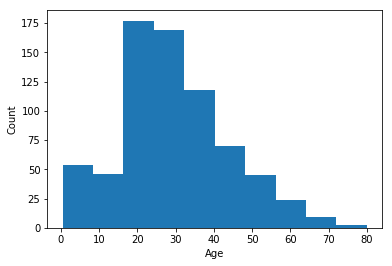

In [11]:
# age distribution of passengers
plt.hist(train_df['Age'].dropna())
plt.xlabel('Age')
plt.ylabel('Count')

Text(0,0.5,'Count')

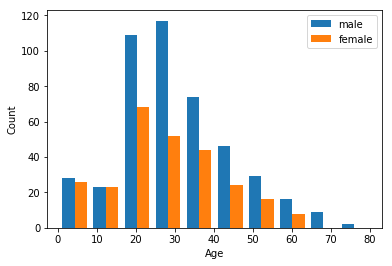

In [12]:
# age and sex combined distribution of passengers
plt.hist([train_df[train_df['Sex'] == 'male'].Age,train_df[train_df['Sex'] == 'female'].Age])
plt.legend(['male','female'])
plt.xlabel('Age')
plt.ylabel('Count')

In [13]:
# use crosstab to test the distribution between sex and survival rate
pd.crosstab(train_df['Survived'],train_df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [14]:
# use crosstab to test the distribution between class and survival rate
pd.crosstab(train_df['Survived'],train_df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


## Data Wrangling & Visulization

In [15]:
# fill out the missing values in Embarked using forward fill method since it only has two missing values 
train_df['Embarked'] = train_df['Embarked'].fillna(method = 'ffill')

In [16]:
# fill out the missing values in Age using random choice filled out based on age distribution percentage 
s = train_df['Age'].value_counts(normalize = True)
train_df['Age'].interpolate(method='linear', inplace=True)
missing_age = train_df['Age'].isnull()
train_df.loc[missing_age,'Age'] = np.random.choice(s.index, size = len(train_df[missing_age]),p=s.values)

In [17]:
# drop off Cabin due to too many missing values
train_df = train_df.drop(['Cabin'], axis=1)

In [18]:
# create a new feature FamilySize to represent the addition of SibSp and Parch
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
# create a new feature IsAlone based on the number of FamilySize; when FamilySize = 1, IsAlone = 1, otherwise, IsAlone = 0
train_df['IsAlone'] = 1
train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

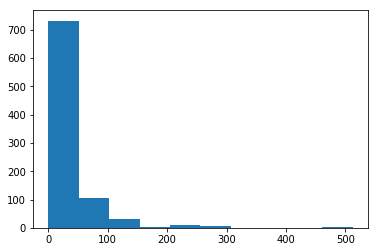

In [19]:
# check Fare distribution
plt.hist(train_df['Fare']) 

In [20]:
# create a new feature FareBin to separate all the fares based on 25%, 50%, 75%
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4)

In [21]:
# create a new feature AgeBin to separate all the ages into five equal bins
train_df['AgeBin'] = pd.cut(train_df['Age'], 5)

In [22]:
# drop off Name and Ticket two features that hard to use
train_df = train_df.drop(['Ticket','Name'], axis = 1)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# use LabelEncoder to transform categorical features Sex, Embarked, Agebin, Farebin into numerical features
label_encode = LabelEncoder()
labels = ['Sex','Embarked','AgeBin','FareBin']
for label in labels:
    print (label,type(label))
    new_label = label + '_Code'
    train_df[new_label] = label_encode.fit_transform(train_df[label])

Sex <class 'str'>
Embarked <class 'str'>
AgeBin <class 'str'>
FareBin <class 'str'>


## Training Data Set-up

In [25]:
# summarize all the features and pick up final features for prediction
original_feature = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
new_feature = ['FamilySize','IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
final_features = ['Pclass','Age','SibSp','Parch','Fare','FamilySize',
                  'IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']

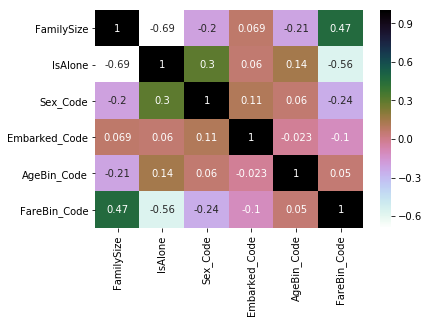

In [26]:
# check the heatmap for all the new features
sns.heatmap(train_df[new_feature].corr(),annot=True,cmap='cubehelix_r')

In [27]:
# check the updated dataset after some data wrangling
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
0,1,0,3,male,22.0,1,0,7.2500,S,2,0,"(-0.001, 7.91]","(16.336, 32.252]",1,2,1,0
1,2,1,1,female,38.0,1,0,71.2833,C,2,0,"(31.0, 512.329]","(32.252, 48.168]",0,0,2,3
2,3,1,3,female,26.0,0,0,7.9250,S,1,1,"(7.91, 14.454]","(16.336, 32.252]",0,2,1,1
3,4,1,1,female,35.0,1,0,53.1000,S,2,0,"(31.0, 512.329]","(32.252, 48.168]",0,2,2,3
4,5,0,3,male,35.0,0,0,8.0500,S,1,1,"(7.91, 14.454]","(32.252, 48.168]",1,2,2,1


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
FareBin          891 non-null category
AgeBin           891 non-null category
Sex_Code         891 non-null int64
Embarked_Code    891 non-null int64
AgeBin_Code      891 non-null int64
FareBin_Code     891 non-null int64
dtypes: category(2), float64(2), int64(11), object(2)
memory usage: 106.4+ KB


In [29]:
# set up training set and result set
all_x = train_df[final_features]
y = train_df['Survived']
# check the head of training set
all_x.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
0,3,22.0,1,0,7.2500,2,0,1,2,1,0
1,1,38.0,1,0,71.2833,2,0,0,0,2,3
2,3,26.0,0,0,7.9250,1,1,0,2,1,1
3,1,35.0,1,0,53.1000,2,0,0,2,2,3
4,3,35.0,0,0,8.0500,1,1,1,2,2,1


In [30]:
# double check no missing values
all_x.isnull().sum()

Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
FamilySize       0
IsAlone          0
Sex_Code         0
Embarked_Code    0
AgeBin_Code      0
FareBin_Code     0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# split training data into 80% for train set and 20% for validation set
xTrain, xValidate, yTrain, yValidate = train_test_split(all_x, y, test_size = 0.2, random_state = 0)

In [33]:
# check train set and test set
xTrain.shape, xValidate.shape, yTrain.shape, yValidate.shape

((712, 11), (179, 11), (712,), (179,))

In [34]:
# check the survival rate of train set and test set
yTrain.mean(),yValidate.mean()

(0.38342696629213485, 0.3854748603351955)

## Machine Leaning Model Selection & Training Data

#### Considering to predict the ultimate result as survive or not, select the three models used for supervised learning classification, Logistic Regression, Decision Tree, and Random Forest

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
# create model set
logr = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
models = [logr,dtree,rf]

In [37]:
# check the accuracy of both sets under the three models
for model in models:
    print ('\nThe current model is', model)
    model.fit(xTrain, yTrain)
    print ('\nTraining accuracy is',np.mean(model.predict(xTrain) == yTrain))
    print ('\nTesting accuracy is',np.mean(model.predict(xValidate) == yValidate))


The current model is LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Training accuracy is 0.7963483146067416

Testing accuracy is 0.7932960893854749

The current model is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Training accuracy is 0.9887640449438202

Testing accuracy is 0.7877094972067039

The current model is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
           

In [38]:
# change parameters in logistic regrssion model with balanced weights
logr2 = LogisticRegression(class_weight="balanced")

In [39]:
logr2.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [40]:
np.mean(logr2.predict(xTrain) == yTrain),np.mean(logr2.predict(xValidate) == yValidate)

(0.7724719101123596, 0.7988826815642458)

In [41]:
# change parameters in decision tree model to decrease overfitting
dtree2 = DecisionTreeClassifier(max_depth=3,min_samples_split=5)

In [42]:
dtree2.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
np.mean(dtree2.predict(xTrain) == yTrain),np.mean(dtree2.predict(xValidate) == yValidate)

(0.827247191011236, 0.8212290502793296)

In [47]:
# change parameters in random forest model
rf2 = RandomForestClassifier(n_estimators=15)

In [48]:
rf2.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
np.mean(rf2.predict(xTrain) == yTrain),np.mean(rf2.predict(xValidate) == yValidate)

(0.9775280898876404, 0.8435754189944135)

## Result Measurement

#### After adjusting some parameters in all the three models, the testing accuracy increase to 79.89%, 82.12%, and 84.36%, respectively.
#### The best model that have the highest accuracy is Random Forest.